In [169]:
%matplotlib inline
from matplotlib.backends.backend_pgf import PdfPages
import matplotlib.pyplot as plt
import PyPDF2 
import pickle
import github_analysis.freq_graph as fg
from importlib import reload
import joypy
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [152]:
#Load data
# clusters looks like {cluster_id:[123,456,...]} where 123 and 456 are proj ids in that cluster
pickle_in = open("./results/motifs_by_cluster.pickle","rb")
motifs_by_cluster = pickle.load(pickle_in)

pickle_in = open("./results/clusters.pickle","rb")
clusters = pickle.load(pickle_in)

# Load Data
comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj.csv').set_index('p_id')
pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj.csv').set_index('p_id')
issues_by_proj = pd.read_csv('data/issues_by_proj.csv').set_index('p_id')

project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj],axis=1)

# Cluster 0

In [153]:
cluster0 = project[project.index.isin(clusters[0])]

In [161]:
cluster0.describe()

,commits,authors,prs,code_reviews,issues
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,99.434028,3.413194,1.361111,0.121528,7.253472
std,216.561912,11.881797,7.686915,1.040548,39.664117
min,9.000000,1.000000,0.000000,0.000000,0.000000
25%,27.750000,1.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,0.000000,0.000000,0.000000
75%,101.000000,3.000000,0.000000,0.000000,2.000000
max,3224.000000,177.000000,122.000000,14.000000,610.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

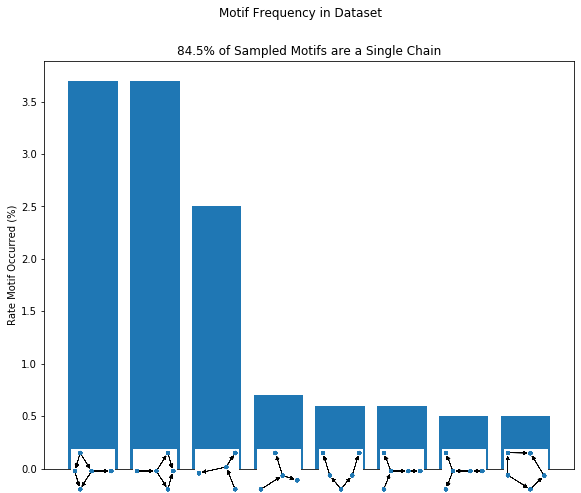

In [154]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[0])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

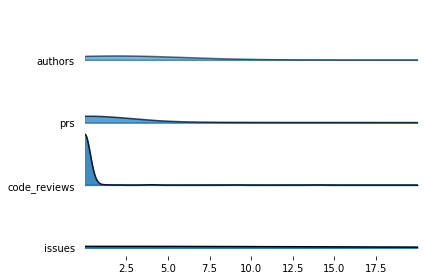

In [160]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster0[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

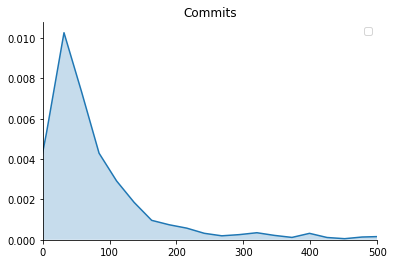

In [157]:
ax = sns.kdeplot(cluster0.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

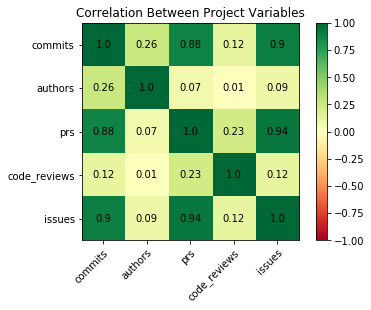

In [173]:
p = cluster0.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 1